## Lab 5 - Linear Regression

## Part 1: Linear Regression Walkthrough

### Step 1: Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

### Step 2: Generate Dataset

In [2]:
# Generate synthetic data: hours studied vs exam score
np.random.seed(0)  # For reproducibility
hours_studied = np.random.rand(100, 1) * 10  # Random values in a 10-hour range
exam_scores = 2 * hours_studied + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Convert to a DataFrame for easier handling
data = pd.DataFrame({'Hours Studied': hours_studied.flatten(), 'Exam Score': exam_scores.flatten()})

### Step 3: Visualize Data

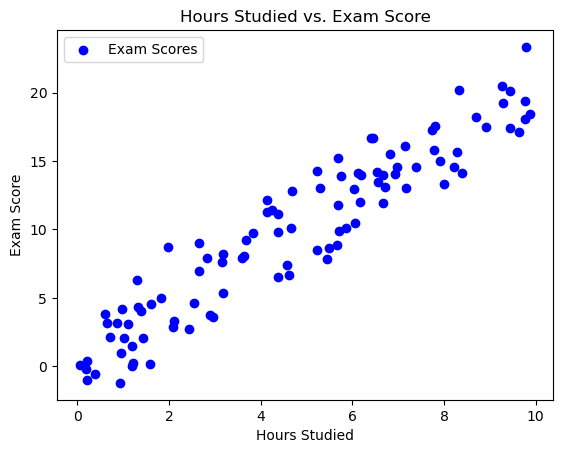

In [3]:
plt.scatter(data['Hours Studied'], data['Exam Score'], color='blue', label='Exam Scores')
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

What do you infer from the visualized data?

Upon examining the scatterplot, a strong positive relationship is clearly observed between the hours stuided by a student and score obtained in the exam.
More the hours studied better the scores in the exam have been. It is recommended that students put in efforts to spend more hours studying to improve their scores. It could also be assumed that all the students have decent intellegence and there is no negative or no impact of hour spent on exam scores which students usually complain about due to exam pressure as well.

### Step 4: Prepare Data

In [4]:
# Split the dataset
X = data[['Hours Studied']]
y = data['Exam Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Why do we split data? How do you decide the portions for train and test sets?

We split the data into training and testing sets to train the model on one portion and evaluate its performance on another. Typically, an 80-20 split ratio is common for training and testing sets, but this can vary based on factors like dataset size and model complexity. Randomness is introduced in the split process, but setting a random seed ensures reproducibility.

### Step 5: Create and Train Model

In [5]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

LinearRegression()

### Step 6: Model Evaluation

In [6]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 1.60
R-squared: 0.85


### Step 7: Make Predictions

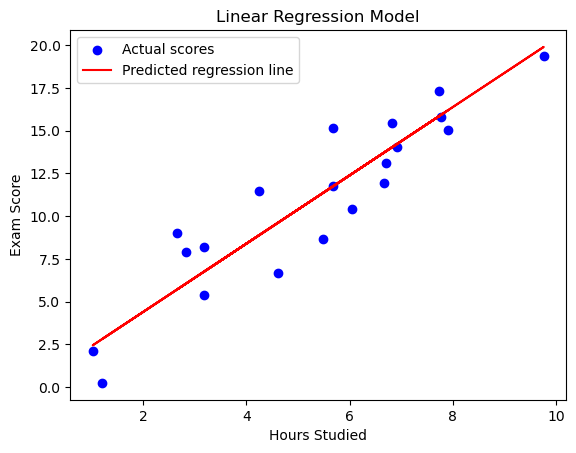

In [7]:
# Visualization of the model predictions
plt.scatter(X_test, y_test, color='blue', label='Actual scores')
plt.plot(X_test, y_pred, color='red', label='Predicted regression line')
plt.title('Linear Regression Model')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

Discuss about your findings.

The linear regression model performs well, with a mean absolute error (MAE) of 1.60 and an R-squared value of 0.85. This suggests that, on average, the model's predictions are around 1.60 units away from the actual exam scores, and approximately 85% of the variance in the exam scores can be explained by the hours studied. Visually, the predicted regression line closely follows the trend of the actual scores plotted against hours studied. Overall, the model provides a reasonable approximation of the relationship between hours studied and exam scores in the dataset.

## Part 2: Implement a Regression Model

### Task 1: Implement the Regression Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [4]:
data = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
target = pd.Series(target, name='PRICE')

In [5]:
X = data[['RM']]  # Feature: average number of rooms
y = target  # Target variable: median value of owner-occupied homes

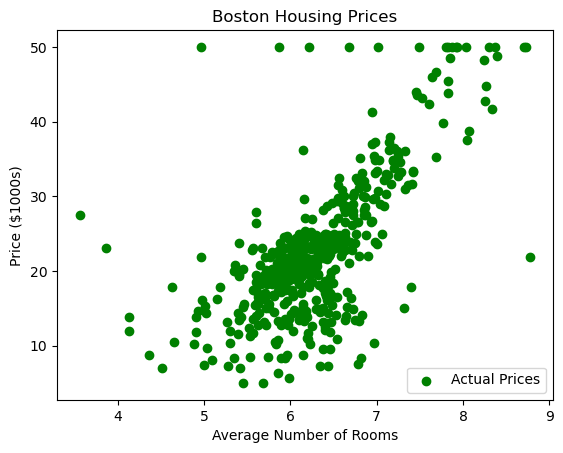

In [11]:
plt.scatter(data['RM'], target, color='green', label='Actual Prices')
plt.title('Boston Housing Prices')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price ($1000s)')
plt.legend()
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 4.48
R-squared: 0.37


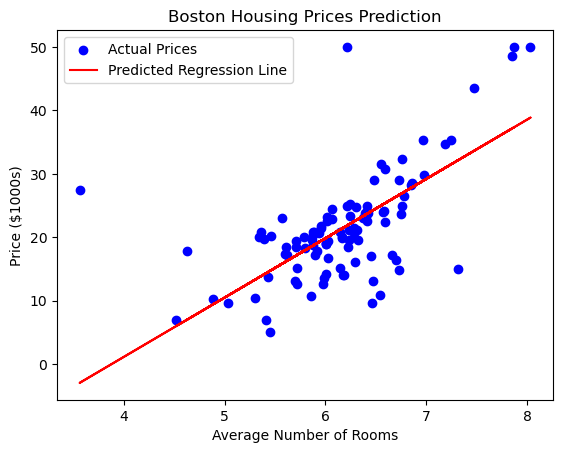

In [10]:
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Regression Line')
plt.title('Boston Housing Prices Prediction')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price ($1000s)')
plt.legend()
plt.show()

Importing Libraries: We import necessary libraries for data manipulation, numerical operations, plotting, and machine learning.
Loading and Preprocessing Data: We load the Boston housing dataset and organize it into a DataFrame with features and a target variable.
Feature Selection and Data Splitting: We select the 'RM' feature (average number of rooms) as the predictor variable and split the data into training and testing sets.
Model Training and Evaluation: We train a linear regression model on the training data and evaluate its performance using mean absolute error (MAE) and R-squared (R^2) on the test set.
Visualization: We visualize the model's predictions against the actual prices to assess its performance graphically.

Discussion:
The linear regression model achieved a mean absolute error of 4.48 and an R-squared value of 0.37 on the test set.
These metrics indicate the model's ability to predict house prices based on the average number of rooms, but it may not capture all factors influencing prices.
Further improvements could be made through feature engineering and model refinement to enhance predictive accuracy.